In [ ]:
# Python Script
# Using emilys.optics.aberration
#
# by J. Barthel / Forschungszentrum Jülich GmbH, Jülich, Germany
# email: ju.barthel@fz-juelich.de
#
# 2019 July 3
#
# Part of the emilys project: https://github.com/ju-bar/emilys
# published under the GNU GPL 3.0 License
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emilys.image.arrayplot as aplt
from emilys.optics.aberration import aberr_axial_func as af

In [3]:
# initialize an axial aberration function of 3rd order
afunc = af(3)

In [8]:
# set aberration coefficients and usage flags
afunc.lcoeff    = [0.+0.j,3.+0.j,-.2+1.5j,20.+125.j,120.-20.j]
afunc.luse_term = [0     ,1     ,1       ,1        ,1        ,0,0,0,0,0,0]

- wmax: (0.128+0.128j)


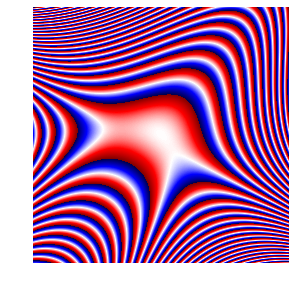

In [9]:
# calculate aberration phase values on a grid
n = 256
pp = np.zeros((n,n))
dwx = 0.0005
dwy = 0.0005
print('- wmax:', dwx*n + dwy*n*1j)
pfac = 2.*np.pi / 0.002
for j in range(0,256):
    wy = (j-128)*dwy
    for i in range(0,256):
        wx = (i-128)*dwx
        pp[j,i] = afunc.chi(wx + wy*1j)*pfac
# plot
pp1 = aplt.arrayplot2d(pp, 1, 'seismic', vrange = [-np.pi, np.pi], vrangetype = 'modulo')